In [1]:
!pip install PySensemakr==0.0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.1/604.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import sensemakr as smkr
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# サンプルデータの生成
np.random.seed(1)
n = 1000
DigitalAdSpend = np.random.normal(20, 5, n)
CustomerAge = np.random.randint(20, 50, n)
PrevPurchase = np.random.choice([0, 1], n)
Region = np.random.choice([1, 2, 3], n)
SalesRevenue = 100 + 3 * DigitalAdSpend + 0.5 * CustomerAge + 2 * PrevPurchase + np.random.normal(0, 10, n) # サンプルの売上データを生成：売上は、デジタル広告費、顧客の年齢、購買履歴、切片(100)、ランダムな数値から構成される設定
df = pd.DataFrame({
    'SalesRevenue': SalesRevenue, # 売上
    'DigitalAdSpend': DigitalAdSpend, # デジタル広告費
    'CustomerAge': CustomerAge, # 顧客の年齢
    'PrevPurchase': PrevPurchase, # 購買履歴
    'Region': Region, # 地域
})

In [6]:
reg_model = smf.ols(formula='SalesRevenue ~ DigitalAdSpend + CustomerAge + PrevPurchase + Region', data=df)
sales_model = reg_model.fit()

In [ ]:
sales_sense = smkr.Sensemakr(model=sales_model,
                             treatment="DigitalAdSpend",
                             benchmark_covariates=["CustomerAge"],
                             kd=[1, 2, 3],
                             ky=[1, 2, 3],
                             q=1.0,
                             alpha=0.05,
                             reduce=True)
sales_sense.summary()

Sensitivity Analysis to Unobserved Confounding

Model Formula: SalesRevenue ~ DigitalAdSpend + CustomerAge + PrevPurchase + Region

Null hypothesis: q = 1.0 and reduce = True 

-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0.0 

Unadjusted Estimates of ' DigitalAdSpend ':
  Coef. estimate: 3.078
  Standard Error: 0.062
  t-value: 49.666 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0.713
  Robustness Value, q = 1.0 : 0.764
  Robustness Value, q = 1.0 alpha = 0.05 : 0.752 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates)  that explains 100% of the residual variance of the outcome, would need to explain at least 71.257 % of the residual variance of the treatment to fully account for the observed estimated effect.

-- Robustness Value, q = 1.0 : unobserved confound

/usr/local/lib/python3.10/dist-packages/sensemakr/sensitivity_bounds.py:292: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append({'bound_label': bound_label, 'r2dz_x': r2dz_x[j], 'r2yz_dx': r2yz_dx[j]},
/usr/local/lib/python3.10/dist-packages/sensemakr/sensitivity_bounds.py:292: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append({'bound_label': bound_label, 'r2dz_x': r2dz_x[j], 'r2yz_dx': r2yz_dx[j]},
/usr/local/lib/python3.10/dist-packages/sensemakr/sensitivity_bounds.py:292: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bounds = bounds.append({'bound_label': bound_label, 'r2dz_x': r2dz_x[j], 'r2yz_dx': r2yz_dx[j]},


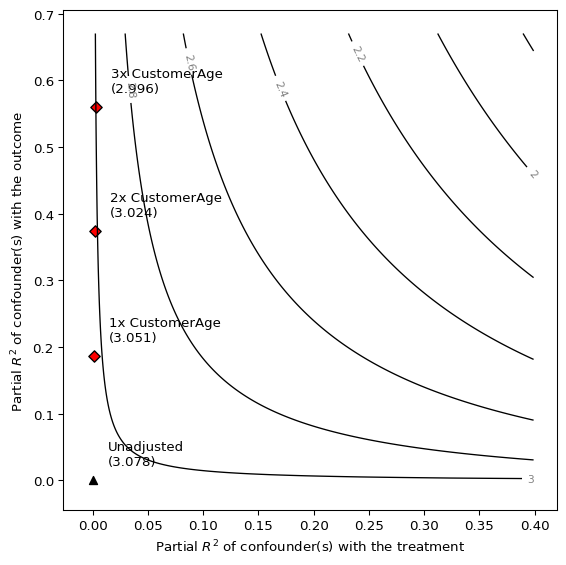

In [ ]:
sales_sense.plot()